In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import random
from IPython.display import clear_output
%config NotebookApp.iopub_msg_rate_limit=10000
import time
from scipy import stats

In [2]:
ad_details = pd.read_csv('ad_details.csv')
ad_events = pd.read_csv('ad_events.csv')
customers = pd.read_csv('customer_profiles.csv')

In [3]:
random.seed(0)

def randomIndex(count, df):
    randList = []
    while len(randList) <= count:
        num = random.randint(0,len(df))
        if not num in randList:
            randList.append(num)
    return randList
        
testIDX = randomIndex(1000, customers)
testCustomers = customers.iloc[testIDX].reset_index(drop=True)

In [4]:
testCustomers.head()

,gender,age,id,became_member_on (year month day),income,ever_married,kids,home_state
0,M,38,261e8e8518ef4383b1b1f3243a29c337,20171214,61000.0,Yes,0,Florida
1,M,32,cabc2b86a6d44f6b931f2bf546f593ab,20170806,30000.0,No,0,Washington
2,F,45,52f3ac705f5e44f0a95a4ac13c04f97a,20171112,65000.0,Yes,0,Pennsylvania
3,M,53,b35f597f7d75438b8b4212647780727a,20180427,71000.0,No,2,Iowa
4,M,21,1acf2c2567854a3f83bc6f80abd2795a,20160209,31000.0,Yes,2,Nebraska


<AxesSubplot:xlabel='age', ylabel='income'>

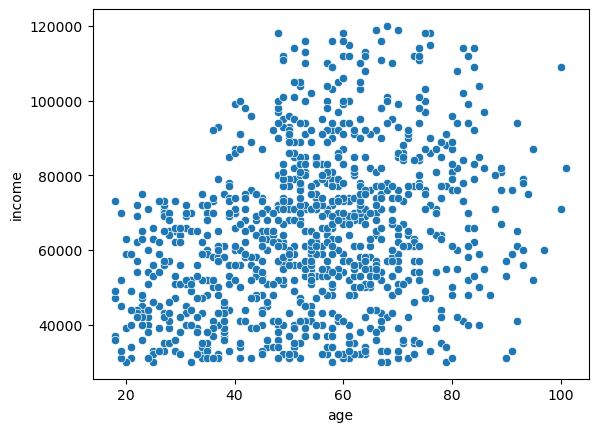

In [5]:
sns.scatterplot(data=testCustomers, x='age', y='income')

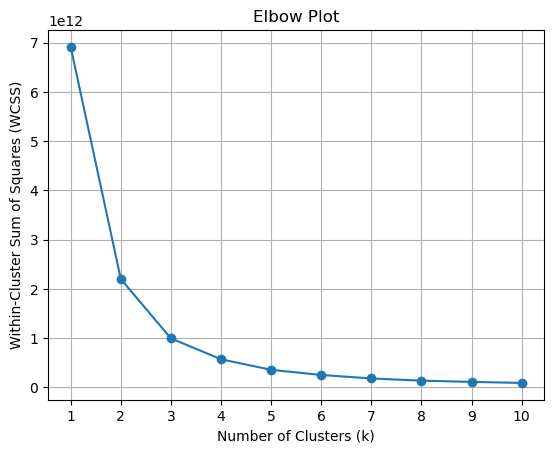

In [6]:
data = customers[['age', 'income']].values

wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

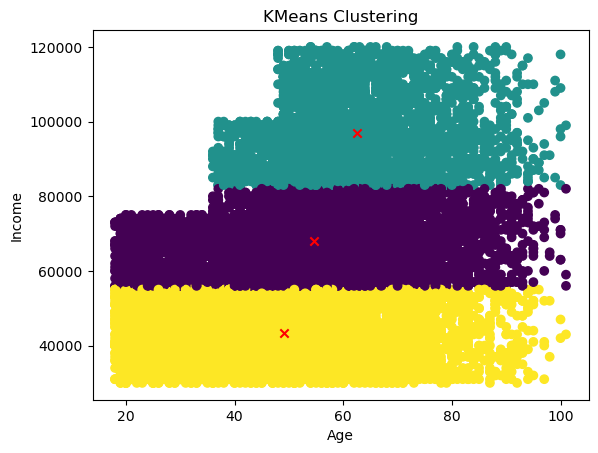

In [7]:
data = customers[['age', 'income']].values
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

# Get cluster assignments for each data point
labels = kmeans.predict(data)

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('KMeans Clustering')
plt.show()

In [8]:
ad_details.head(10)

,reward,channels,required_amount,duration (days),offer_type,ad id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [9]:
ad_events['event'].unique()

array(['offer received', 'offer viewed', 'transaction', 'offer completed'],
      dtype=object)

In [10]:
ad_events.head()

,customer,event,event_info,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [11]:
ad_events.loc[ad_events.loc[:,'customer'] == 'e2127556f4f64592b11af22de27a7932']

,customer,event,event_info,time
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
20283,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},18
102635,e2127556f4f64592b11af22de27a7932,transaction,{'amount': 17.88},288
103834,e2127556f4f64592b11af22de27a7932,transaction,{'amount': 21.43},294
110830,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336
150600,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},408
171209,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},420
201574,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},504
225059,e2127556f4f64592b11af22de27a7932,offer viewed,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},522
225060,e2127556f4f64592b11af22de27a7932,transaction,{'amount': 18.42},522


In [104]:
def splitID(ad):
    adID = ad.split('\'')[3]
    return adID

def getAmount(amount):
    dollars = float(amount.split(' ')[1].split('}')[0])
    return dollars

def checkCompletion(df, i, numAhead):
    changeInTime = df.loc[i+numAhead, 'time'] - df.loc[i, 'time']
    adID = splitID(df.loc[i, 'event_info'])
    adInfo = ad_details.loc[ad_details.loc[:,'ad id'] == adID]
    moneyRequired = float(adInfo['required_amount'])
    durationHours = float(adInfo['duration (days)'])*24
    amountSpent = getAmount(df.loc[i+numAhead, 'event_info'])
    if changeInTime >= durationHours and amountSpent >= moneyRequired:
        return 'completed'
    else:
        return 'not completed'

def findAds(customer):
    locDF = ad_events.loc[ad_events.loc[:,'customer'] == customer].reset_index(drop=True)
    completedDF = locDF.loc[locDF.loc[:,'event'] == 'offer completed'].reset_index(drop=True)
    
    locDF = locDF.drop(locDF.loc[locDF.loc[:,'event'] == 'offer received'].index).reset_index(drop=True)
    locDF = locDF.drop(locDF.loc[locDF.loc[:,'event'] == 'offer completed'].index).reset_index(drop=True)
    
    idxs = []
    for i in range(len(locDF)):
        if locDF.loc[i, 'event'] == 'offer viewed':
            if i < len(locDF) - 1 and locDF.loc[i+1, 'event'] == 'transaction':
                completed = checkCompletion(locDF, i, 1)
                if completed == 'completed':
                    idxs.append(i)
            elif i < len(locDF) - 2 and locDF.loc[i+2, 'event'] == 'transaction':
                completed = checkCompletion(locDF, i, 2)
                if completed == 'completed':
                    idxs.append(i)
            elif i < len(locDF) - 3 and locDF.loc[i+3, 'event'] == 'transaction':
                completed = checkCompletion(locDF, i, 3)
                if completed == 'completed':
                    idxs.append(i)
                          
    ads = []
    for idx in idxs:
        adID = splitID(locDF.loc[idx, 'event_info'])
        ads.append(adID)
        
    for i in range(len(completedDF)):
        adID = splitID(completedDF.loc[i, 'event_info'])
        if not adID in ads:
            ads.append(adID)
        
    return ads

In [109]:
findAds(customers.loc[5, 'id'])

['5a8bc65990b245e5a138643cd4eb9837',
 '4d5c57ea9a6940dd891ad53e9dbe8da0',
 'ae264e3637204a6fb9bb56bc8210ddfd',
 'f19421c1d4aa40978ebb69ca19b0e20d']

In [85]:
allCustomers = customers['id'].unique() 

In [110]:
customers['adsWorked'] = pd.Series(dtype='object')
for i in range(len(allCustomers)):
    ads = findAds(allCustomers[i])
    customers.at[i, 'adsWorked'] = ads
    percentDone = round(((i+1)/len(allCustomers))*100,2)
    clear_output(wait=True)
    time.sleep(0.001)
    print(str(percentDone) + "% done")

100.0% done


In [111]:
customers.loc[9,'adsWorked']

['9b98b8c7a33c4b65b9aebfe6a799e6d9', '2298d6c36e964ae4a3e7e9706d1fb8c2']

In [112]:
cluster_dataframes = {}
for label in set(labels):
    cluster_dataframes[label] = customers[labels == label]
    
for label, df in cluster_dataframes.items():
    cluster_dataframes[label] = df.reset_index(drop=True)

In [113]:
def separateWords(string):
    chars_to_remove = ['[', ']', '\'', ',']

    new_string = string
    for char in chars_to_remove:
        new_string = new_string.replace(char, '')
    strings = new_string.split(' ')
    return strings

In [114]:
from collections import Counter

cluster_bestAdTypes = []

for key, df in cluster_dataframes.items():
    allAdTypes = []
    allChannelTypes = []
    for ads in df['adsWorked']:
        types = []
        channels = []
        for ad in ads:
            index = ad_details['ad id'] == ad
            channels.extend(ad_details.loc[index, 'channels'])
            types.extend(ad_details.loc[index, 'offer_type'])
        allAdTypes.extend(types)
        for sublist in channels:
            sublist = separateWords(sublist)
            allChannelTypes.extend(sublist)
    
    # Count occurrences of ad types and channels
    ad_type_counter = Counter(allAdTypes)
    channel_counter = Counter(allChannelTypes)
    
    # Get the top 3 ad types and channels
    top_ad_types = [ad[0] for ad in ad_type_counter.most_common(3)]
    top_channels = [channel[0] for channel in channel_counter.most_common(3)]
    
    cluster_bestAdTypes.append([top_ad_types, top_channels])

In [115]:
#the best ad types for each cluster
cluster_bestAdTypes

[[['discount', 'bogo', 'informational'], ['email', 'mobile', 'web']],
 [['bogo', 'discount', 'informational'], ['email', 'mobile', 'web']],
 [['discount', 'bogo', 'informational'], ['email', 'mobile', 'web']]]